In [10]:
import numpy as np
import os
import matplotlib.pyplot as plot
from PIL import Image
import cv2
import random
import seaborn as sns
import tensorflow as tf

2022-08-23 18:54:35.379964: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [49]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [50]:
train_folder="cityscapes_data/cityscapes_data/train"
valid_folder="cityscapes_data/cityscapes_data/val"
width = 256
height = 256
classes = 13
batch_size = 10
num_of_training_samples = len(os.listdir(train_folder)) 
num_of_testing_samples = len(os.listdir(valid_folder))

In [51]:
def LoadImage(name, path):
    img = Image.open(os.path.join(path, name))
    img = np.array(img)
    
    image = img[:,:256]
    mask = img[:,256:]
    
    return image, mask

In [52]:
def getSegmentationArr(mask, classes, width=width, height=height):
    masked=mask.reshape((mask.shape[0]*mask.shape[1],3))
    pred=kmeans.predict(masked)
    pred.shape
    pred=pred.reshape(mask.shape[0],mask.shape[1])
    
    seg_labels = np.zeros((height, width, classes))
    
    for c in range(classes):
        seg_labels[:, :, c] = (pred == c ).astype(int)
    return seg_labels

In [53]:
train_list=os.listdir('cityscapes_data/train')
from tqdm import tqdm
colors=[]

for i in tqdm(range(150)):
    print(i)
    x,y=LoadImage(train_list[i],train_folder)
    colors.append(y.reshape(y.shape[0]*y.shape[1],3))

 31%|████████████▌                            | 46/150 [00:00<00:00, 456.92it/s]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


100%|████████████████████████████████████████| 150/150 [00:00<00:00, 516.86it/s]

101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [54]:
colors = np.array(colors)
colors = colors.reshape((colors.shape[0]*colors.shape[1],3))
colors.shape

(9830400, 3)

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(colors)

KMeans(n_clusters=13, random_state=0)

In [56]:
kmeans.cluster_centers_

array([[127.92820507,  63.15758028, 127.24838151],
       [ 68.79386   ,  70.57237309,  69.73061967],
       [107.04539995, 139.87945078,  37.17166287],
       [237.19953987,  39.4020828 , 225.56577525],
       [  4.48924983,   3.51442158,   5.37692497],
       [  3.48671434,   2.72335342, 137.1826217 ],
       [157.55045947, 245.66428256, 155.47175393],
       [ 75.50636199, 127.18182937, 173.89344827],
       [131.6437979 , 136.66876876, 117.44489917],
       [206.5505194 ,  24.89567865,  60.9980845 ],
       [218.78768062, 157.04967582, 158.77965305],
       [ 79.16370744,   5.86134386,  72.07931487],
       [215.92786635, 204.31140087,  32.04876868]])

In [57]:
l=list(kmeans.labels_)
s=set(l)
s

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [58]:
def give_color_to_seg_img(seg, n_classes=classes):
    
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

In [59]:
def addColors(gg):
        im = np.zeros([gg.shape[0],gg.shape[1],3],dtype=np.uint8)
        for i in range(gg.shape[0]):
             for u in range(gg.shape[1]):
                if gg[i,u]==0:
                        im[i,u]=np.array( [7.97324365,  100.09284559, 3.3311774 ])# np.array([106.90082868, 139.99479298,  36.44992868]) #dirty-green
                if gg[i,u]==12:
                        im[i,u]= np.array([125.15370551, 128.00683271, 102.70661342]) 
                if gg[i,u]==11:
                        im[i,u]= np.array( [205.10936684, 155.91383531, 158.10853995])
                if gg[i,u]==10:
                        im[i,u]= np.array([202.89782929,  26.40039899,  61.60446492])
                if gg[i,u]==9:
                        im[i,u]= np.array([ 69.55103943,  70.40548991,  69.17557542])#road
                if gg[i,u]==8:
                        im[i,u]=np.array( [127.97324365,  63.09284559, 127.3311774 ])
       
                if gg[i,u]==7:
                        im[i,u]=np.array([ 76.50791694, 126.13882776, 172.87875815]) #sky
                if gg[i,u]==6:
                        im[i,u]=np.array( [157.75659272, 245.35283586, 155.30654771]) #road-dividers
                if gg[i,u]==4:
                        im[i,u]=np.array([ 80.53963208,   6.04446257,  71.14193837]) #buildings
                if gg[i,u]==5:
                        im[i,u]= np.array( [  3.55582649,   3.56494346, 136.37082893])#vehicles
                if gg[i,u]==3:
                        im[i,u]=np.array( [237.59908029,  39.26874128, 225.79570494])
                if gg[i,u]==2:
                        im[i,u]=np.array([  4.1605802 ,   3.27185434,   6.7030066 ])
                if gg[i,u]==1:
                        im[i,u]=np.array( [214.7472683 , 206.44713466,  33.15308545])
                #if gg[i,u]==0:
                 #       im[i,u]=np.array([0,128,0])
        return im

In [60]:
im,mask=LoadImage(train_list[4],train_folder)
c1=getSegmentationArr(mask, classes, width=width, height=height)
#c=give_color_to_seg_img(np.argmax(c1,axis=-1), n_classes=13)
c=addColors(np.argmax(c1,axis=-1))

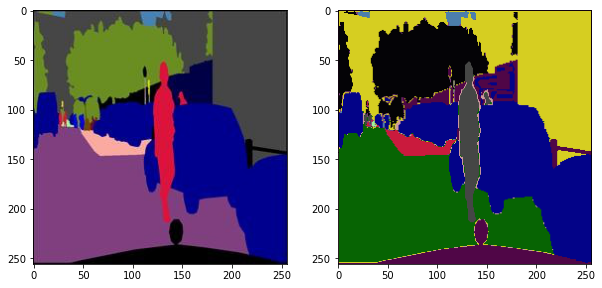

In [61]:
fig,ax=plot.subplots(1,2,figsize=(10,10))
ax[0].imshow(mask)
ax[1].imshow(c)
plot.show()

In [62]:
def DataGenerator(path, batch_size=10, classes=13):
    files = os.listdir(path)
    while True:
        for i in range(0, len(files), batch_size):
            batch_files = files[i : i+batch_size]
            imgs=[]
            segs=[]
            for file in batch_files:
                image, mask = LoadImage(file, path)
                labels = getSegmentationArr(mask, classes)

                imgs.append(image)
                segs.append(labels)

            yield np.array(imgs), np.array(segs)

In [63]:
train_gen = DataGenerator(train_folder, batch_size=batch_size)
val_gen = DataGenerator(valid_folder, batch_size=batch_size)

In [64]:
imgs, segs = next(train_gen)
imgs.shape, segs.shape

((10, 256, 256, 3), (10, 256, 256, 13))

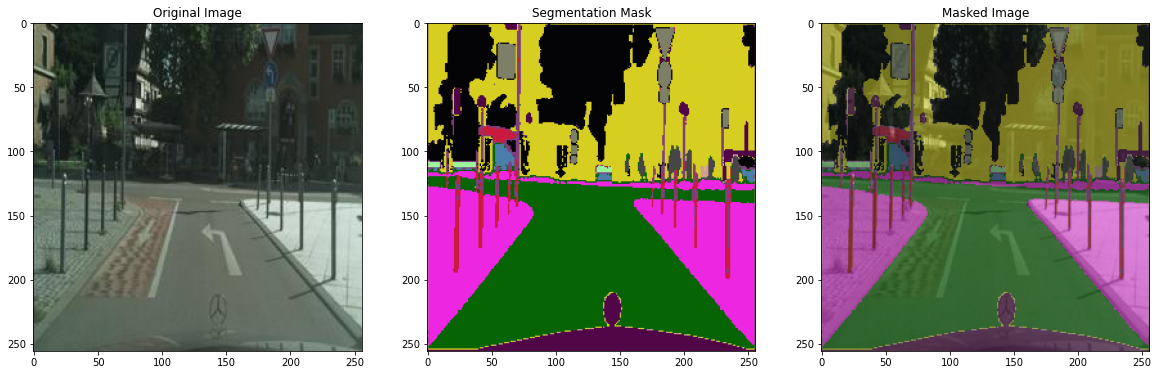

In [65]:
image = imgs[7]
mask = addColors(np.argmax(segs[7], axis=-1))
masked_image = cv2.addWeighted(image, 0.5, mask,0.5, 0)

fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(mask)
axs[1].set_title('Segmentation Mask')
#predimg = cv2.addWeighted(imgs[i]/255, 0.6, _p, 0.4, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()

In [66]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [67]:
def segnet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    #step1
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1=BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1=BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    #step2
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2=BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2=BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    #step3
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    #step4
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4=BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    #step5
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

    #step6
    up6 = Conv2D(1024, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    merge6 = concatenate([conv5,up6], axis = 3)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6=BatchNormalization()(conv6)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6=BatchNormalization()(conv6)
    
    #step7
    up7 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv4,up7], axis = 3)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7=BatchNormalization()(conv7)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7=BatchNormalization()(conv7)
    
    #step8
    up8 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv3,up8], axis = 3)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8=BatchNormalization()(conv8)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8=BatchNormalization()(conv8)

    #step9
    up9 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv2,up9], axis = 3)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9=BatchNormalization()(conv9)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9=BatchNormalization()(conv9)
    
    #step10   
    up10 = Conv2D(64,3,activation='relu',padding='same',kernel_initializer = 'he_normal')(UpSampling2D(size=(2,2))(conv9))
    merge10 = concatenate([conv1,up10],axis=3)
    conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge10)
    conv10=BatchNormalization()(conv10)
    conv10 = Conv2D(13, 1, activation = 'softmax')(conv10)

    model = Model(inputs,conv10)
    opt = Adam(lr=0.0001)
    model.compile(optimizer=opt,
             loss="categorical_crossentropy",
             metrics=["accuracy"])    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [68]:
model=segnet(pretrained_weights = None,input_size = (256,256,3))
model.summary()

NameError: name 'Adam' is not defined

In [22]:
history = model.fit_generator(train_gen, epochs=10, steps_per_epoch=num_of_training_samples//batch_size,
                       validation_data=val_gen, validation_steps=num_of_testing_samples//batch_size)

/tmp/ipykernel_20906/2109147037.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=10, steps_per_epoch=num_of_training_samples//batch_size,


Epoch 1/10


2022-08-23 17:48:38.633559: E tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded runtime CuDNN library: 8.0.5 but source was compiled with: 8.1.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2022-08-23 17:48:38.634339: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops.cc:1120 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'model/conv2d/Conv2D' defined at (most recent call last):
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_20906/2109147037.py", line 1, in <cell line: 1>
      history = model.fit_generator(train_gen, epochs=10, steps_per_epoch=num_of_training_samples//batch_size,
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/training.py", line 2260, in fit_generator
      return self.fit(
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/layers/convolutional/base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/home/kusw/anaconda3/envs/barefoot/lib/python3.8/site-packages/keras/layers/convolutional/base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'model/conv2d/Conv2D'
DNN library is not found.
	 [[{{node model/conv2d/Conv2D}}]] [Op:__inference_train_function_6139]

In [1]:
import tensorflow
tensorflow.__version__

2022-08-23 18:40:26.297557: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


'2.4.0'

In [23]:
pip install cudnn

ERROR: Could not find a version that satisfies the requirement cudnn (from versions: none)
ERROR: No matching distribution found for cudnn
Note: you may need to restart the kernel to use updated packages.


In [34]:
import cv2
m='105.jpg'
m,tru=LoadImage(m, valid_folder)
i=np.asarray(m)
i=i.reshape((1,256,256,3))
i.shape

(1, 256, 256, 3)

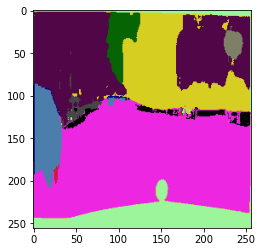

In [35]:
r=model.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))
plot.imshow(s)

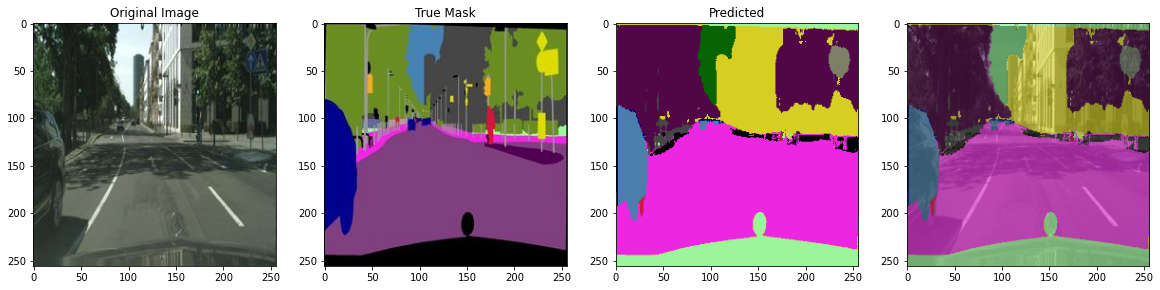

In [36]:
from cv2 import *
fig, axs = plot.subplots(1, 4, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(tru)
axs[1].set_title('True Mask')
axs[2].imshow(s)
axs[2].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.4,s,0.6, 0)
axs[3].imshow(masked_image)
plot.show()

## Final Predictions: 

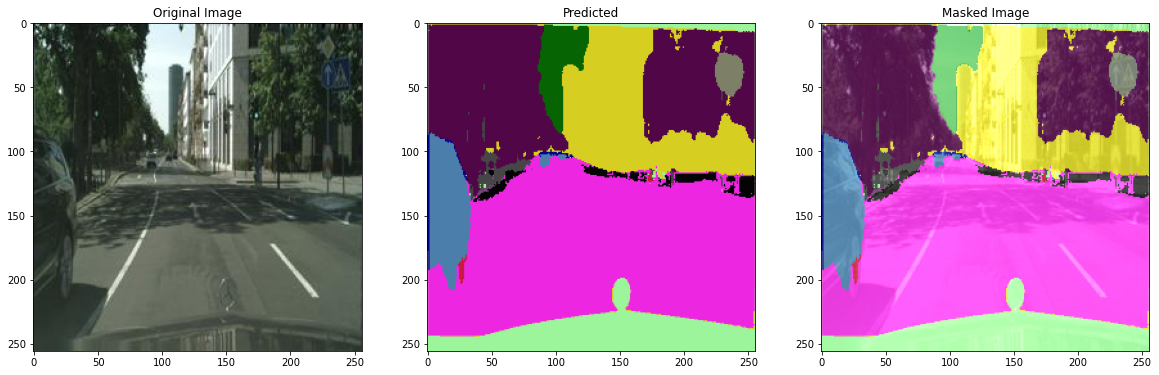

In [37]:
from cv2 import *
fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(s)
axs[1].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.5,s,0.9, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()